# 2023.05.11
파이토치 튜토리얼(https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html) 내용 공부 및 정리

Google Colab으로 진행

## 5. TORCH.AUTOGRAD를 이용한 자동 미분
신경망을 학습할 때 가장 자주 사용되는 알고리즘은 역전파이다. 역전파에서, 매개변수(model weight)는 주어진 매개변수에 대한 손실 함수의 변화도(gradient)에 따라 조정된다.

이러한 변화도를 계산하기 위해 PyTorch에서는 torch.autograd라는 자동미분 엔진이 있다.

    (Definition)
    * x: input
    * w: weight
    * b: bias
    Linear Regression hypothesis
    H(x) = Wx + b

In [1]:
import torch
# input
x = torch.ones(5)
# ouput
y = torch.zeros(3)
# Weight 
w = torch.randn(5,3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
# Part of Layer in deeplearning model
z = torch.matmul(x, w) + b
# binary cross entropy
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

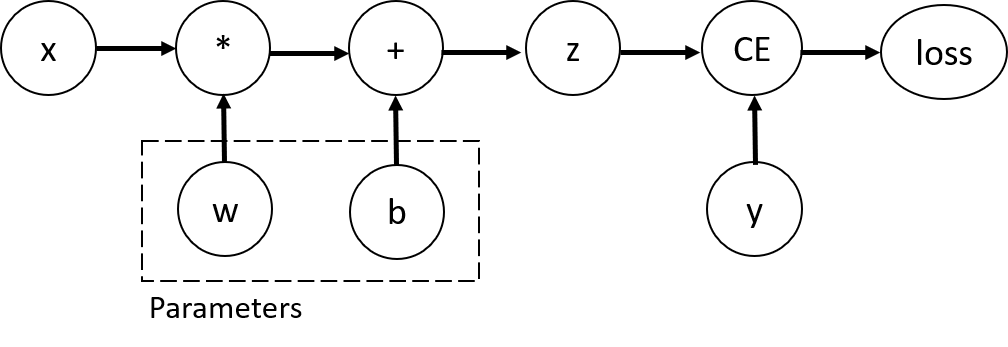

이 신경망에서 $w$와 $b$는 최적화해야 하는 매개변수이다. 이때 경사 하강법을 이용하여 비용이 최소화되는 방향을 찾는다.

* 비용함수를 미분하여 이 함수의 기울기를 구하고, 손실이 최소화되는 방향 또는 오차를 최소화 되는 방향을 찾는 것
* 위 $w$와 $b$에 requires_grad라는 속성이 최적화의 유무를 밝힌다.
* requires_grad는 텐서를 생성할 때 설정하거나, 나중에 x.requires_grad_(True) 메소드를 이용할 수 도 있다.

In [2]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f8387b4b6d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f8387b4bd60>


Gradient를 계산하는 방법은 backward()를 호출해서 Chain Role을 통해 derivative를 계산한다. 즉, $$\frac{\partial loss}{\partial w},\quad \frac{\partial loss}{\partial b} $$를 계산한다.

In [3]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0720, 0.2134, 0.1108],
        [0.0720, 0.2134, 0.1108],
        [0.0720, 0.2134, 0.1108],
        [0.0720, 0.2134, 0.1108],
        [0.0720, 0.2134, 0.1108]])
tensor([0.0720, 0.2134, 0.1108])


이때, requires_grad가 True 경우에만 grad를 적용할 수 있다.

Gradient 계산이 끝나고(모델 fit 이후), 입력데이터를 적용하는 경우에는 grad를 고려하지 않아도 된다.torch.no_grad()는 연산의 필요성을 확인할 수 있다.

In [4]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


동일한 결과를 확인하는 방법은 텐서에 detach()를 적용하는 것이다.

In [5]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


# PyTorch로 시작하는 딥러닝 입문 (https://wikidocs.net/book/2788)

## 0.3 선형회귀(Linear Regression)
예시) X가 1, 2, 3일 때, Y가 2, 4, 6이 나왔다. 그렇다면 4를 넣으면 어떤 값이 나올까?

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
# 랜덤 시드 고정
torch.manual_seed(113)

In [8]:
# 변수선언
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [9]:
print(X_train) 
print(X_train.size()) # 3x1 matrix

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


Recall

$H(x) = Wx + b$에서 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 것

$→$ 직선을 정의하는 $W$, $b$를 찾는 것

In [11]:
# Weight, bias 초기화
W = torch.zeros(1, requires_grad = True)
print(W)
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [12]:
# Define hypothesis

h = X_train*W + b
print(h)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


Define Cost function (Mean Squares Error)

$$ cost(W,b) = \frac{1}{n}\sum_{i=1}^{n}\bigg[y^{(i)} - H(x^{(i)})\bigg]^{2}$$

In [13]:
cost = torch.mean((h-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


Define optimizer function (Stochastic Gradient Descent)
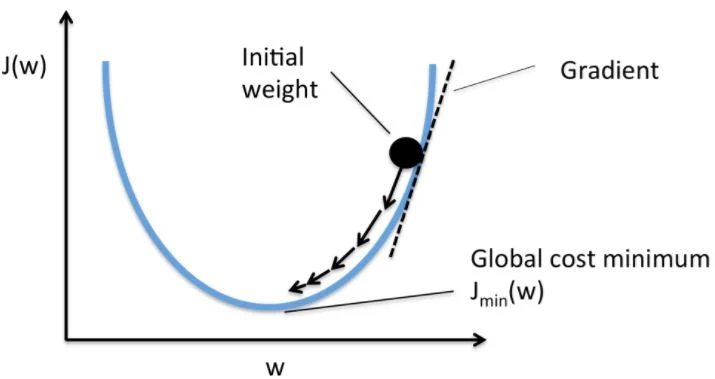

In [14]:
# 자동 미분(grad)가능한 W, b를 최적화하는 함수 정의
# 방법은 SGD를 사용하고, lr은 learning rate를 의미
optimizer = optim.SGD([W, b], lr = 0.01)

In [ ]:
# W, b를 초기화했던 것 처럼, optimizer의 기울기도 0으로 초기화
optimizer.zero_grad()
# backward()를 통해 정의한 cost function 미분 (requires_grad = True인 W, b를 미분함)
cost.backward()
# update W and b
optimizer.step()

In [20]:
# Full code
# 변수선언
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# Weight, bias 초기화
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# Define hypothesis & cost function
hx = X_train*W + b
cost = torch.mean((h-y_train)**2)

epochs = 1999
optimizer = optim.SGD([W,b], lr =0.01)
for epoch in range(epochs +1):
    hx = X_train*W + b
    cost = torch.mean((hx - y_train)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs+1} W:{round(W.item(),3)}, b: {round(b.item(),3)}, Cost: {round(cost.item(),6)}')

Epoch 0/2000 W:0.187, b: 0.08, Cost: 18.666666
Epoch 100/2000 W:1.746, b: 0.578, Cost: 0.048171
Epoch 200/2000 W:1.8, b: 0.454, Cost: 0.029767
Epoch 300/2000 W:1.843, b: 0.357, Cost: 0.018394
Epoch 400/2000 W:1.876, b: 0.281, Cost: 0.011366
Epoch 500/2000 W:1.903, b: 0.221, Cost: 0.007024
Epoch 600/2000 W:1.924, b: 0.174, Cost: 0.00434
Epoch 700/2000 W:1.94, b: 0.136, Cost: 0.002682
Epoch 800/2000 W:1.953, b: 0.107, Cost: 0.001657
Epoch 900/2000 W:1.963, b: 0.084, Cost: 0.001024
Epoch 1000/2000 W:1.971, b: 0.066, Cost: 0.000633
Epoch 1100/2000 W:1.977, b: 0.052, Cost: 0.000391
Epoch 1200/2000 W:1.982, b: 0.041, Cost: 0.000242
Epoch 1300/2000 W:1.986, b: 0.032, Cost: 0.000149
Epoch 1400/2000 W:1.989, b: 0.025, Cost: 9.2e-05
Epoch 1500/2000 W:1.991, b: 0.02, Cost: 5.7e-05
Epoch 1600/2000 W:1.993, b: 0.016, Cost: 3.5e-05
Epoch 1700/2000 W:1.995, b: 0.012, Cost: 2.2e-05
Epoch 1800/2000 W:1.996, b: 0.01, Cost: 1.3e-05
Epoch 1900/2000 W:1.997, b: 0.008, Cost: 8e-06


여기서 X_train이 1, 2, 3일 때 결론이 2, 4, 6으로 나오게하는 $H(x)$ 함수를 $W$, $b$를 미분하여 최적화한다. 이때 에포크(epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다. 이 경우 2000번 진행됨.

\
Conclusion
* 최적의 기울기 $W$는 2에 가깝고, $b$는 0에 가까움.
* X_train으로 y_train이 되게하는 함수는 $H(x) = 2x$이므로 거의 정답에 가까워짐.

In [41]:
# 최적화를 통해 결론 도출
X_train = torch.tensor(4.0)
print(f'x가 {X_train.item()}일 때 y 예측 값은 {round((X_train*W + b).item(),4)}이다.')

x가 4.0일 때 y 예측 값은 7.9955이다.


In [26]:
# cf 1. Reasonablity of optimizer.zero_grad()
w = torch.tensor(2.0, requires_grad= True)

epochs = 20
#optimizer = optimizer = optim.SGD([w], lr =0.01)
for epoch in range(epochs):
    z = 2*w
    #optimizer.zero_grad()
    z.backward()
    print(f'Eporch {epoch}) 수식을 w로 미분한 값 : {w.grad}')

Eporch 0) 수식을 w로 미분한 값 : 2.0
Eporch 1) 수식을 w로 미분한 값 : 4.0
Eporch 2) 수식을 w로 미분한 값 : 6.0
Eporch 3) 수식을 w로 미분한 값 : 8.0
Eporch 4) 수식을 w로 미분한 값 : 10.0
Eporch 5) 수식을 w로 미분한 값 : 12.0
Eporch 6) 수식을 w로 미분한 값 : 14.0
Eporch 7) 수식을 w로 미분한 값 : 16.0
Eporch 8) 수식을 w로 미분한 값 : 18.0
Eporch 9) 수식을 w로 미분한 값 : 20.0
Eporch 10) 수식을 w로 미분한 값 : 22.0
Eporch 11) 수식을 w로 미분한 값 : 24.0
Eporch 12) 수식을 w로 미분한 값 : 26.0
Eporch 13) 수식을 w로 미분한 값 : 28.0
Eporch 14) 수식을 w로 미분한 값 : 30.0
Eporch 15) 수식을 w로 미분한 값 : 32.0
Eporch 16) 수식을 w로 미분한 값 : 34.0
Eporch 17) 수식을 w로 미분한 값 : 36.0
Eporch 18) 수식을 w로 미분한 값 : 38.0
Eporch 19) 수식을 w로 미분한 값 : 40.0


PyTorch는 미분을 통해 얻은 기울기를 이전 기울기 값에 누적시키는 특징이 있음. Optimizer를 초기화시켜주지 않아, 미분값이 계속 2씩 누적되는 것을 확인 할 수 있음. 따라서 zero_grad()를 통해 미분값을 계속 초기화 시켜줘야함.

In [89]:
# cf 1. Reasonablity of optimizer.zero_grad()
w = torch.tensor(2.0, requires_grad= True)

epochs = 20
optimizer = optimizer = optim.SGD([w], lr =0.01)
for epoch in range(epochs):
    z = 2*w
    optimizer.zero_grad()
    z.backward()
    print(f'Eporch {epoch}) 수식을 w로 미분한 값 : {w.grad}')

Eporch 0) 수식을 w로 미분한 값 : 2.0
Eporch 1) 수식을 w로 미분한 값 : 2.0
Eporch 2) 수식을 w로 미분한 값 : 2.0
Eporch 3) 수식을 w로 미분한 값 : 2.0
Eporch 4) 수식을 w로 미분한 값 : 2.0
Eporch 5) 수식을 w로 미분한 값 : 2.0
Eporch 6) 수식을 w로 미분한 값 : 2.0
Eporch 7) 수식을 w로 미분한 값 : 2.0
Eporch 8) 수식을 w로 미분한 값 : 2.0
Eporch 9) 수식을 w로 미분한 값 : 2.0
Eporch 10) 수식을 w로 미분한 값 : 2.0
Eporch 11) 수식을 w로 미분한 값 : 2.0
Eporch 12) 수식을 w로 미분한 값 : 2.0
Eporch 13) 수식을 w로 미분한 값 : 2.0
Eporch 14) 수식을 w로 미분한 값 : 2.0
Eporch 15) 수식을 w로 미분한 값 : 2.0
Eporch 16) 수식을 w로 미분한 값 : 2.0
Eporch 17) 수식을 w로 미분한 값 : 2.0
Eporch 18) 수식을 w로 미분한 값 : 2.0
Eporch 19) 수식을 w로 미분한 값 : 2.0


## 0.3.4 다중 선형 회귀 (Multivariable Linear regression)
앞선 $x$가 하나인 선형 회귀를 단순 선형 회귀(simple linear regression)이라 한다. 이번에는 다수의 $x$로 $y$를 예측하는 선형 회귀법에 대해 알아본다.

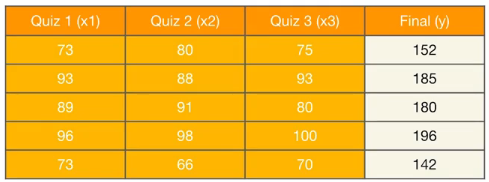

다음의 예시는 3개의 퀴즈 점수로부터 최종 점수를 예측하는 모델을 만들어본다. 독립변수 $x$가 3개이므로, 회귀식은 다음과 같이 표현된다
$$H(x) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3}+b$$
이때 $x = (x_{1}, x_{2}, x_{3}).$

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(113)

In [93]:
# 변수선언
X_train1 = torch.FloatTensor([[73],[93],[89],[96],[73]])
X_train2 = torch.FloatTensor([[80],[88],[91],[98],[66]])
X_train3 = torch.FloatTensor([[75],[93],[80],[100],[70]])

y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([w1,w2,w3,b], lr = 1e-5)
epochs = 50000
for epoch in range(epochs +1):
    hx = X_train1*w1 + X_train2*w2 + X_train3*w3 +b
    cost = torch.mean((hx - y_train)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if cost < 0.11:
        print(epoch)
        break
    if epoch%1000 == 0:
        print(f'Epoch: {epoch}, w1: {round(w1.item(),3)}, w2: {round(w2.item(),3)}, w3: {round(w3.item(),3)}, b: {round(b.item(),3)}, cost: {round(cost.item(), 6)}')

Epoch: 0, w1: 0.294, w2: 0.294, w3: 0.29, b: 0.003, cost: 29661.800781
Epoch: 1000, w1: 0.766, w2: 0.7, w3: 0.559, b: 0.009, cost: 3.941866
Epoch: 2000, w1: 0.84, w2: 0.711, w3: 0.473, b: 0.009, cost: 2.643327
Epoch: 3000, w1: 0.903, w2: 0.713, w3: 0.407, b: 0.01, cost: 1.806983
Epoch: 4000, w1: 0.956, w2: 0.712, w3: 0.355, b: 0.01, cost: 1.257653
Epoch: 5000, w1: 1.0, w2: 0.707, w3: 0.315, b: 0.01, cost: 0.891414
Epoch: 6000, w1: 1.038, w2: 0.702, w3: 0.282, b: 0.01, cost: 0.644611
Epoch: 7000, w1: 1.069, w2: 0.696, w3: 0.257, b: 0.009, cost: 0.476996
Epoch: 8000, w1: 1.095, w2: 0.691, w3: 0.236, b: 0.009, cost: 0.36252
Epoch: 9000, w1: 1.117, w2: 0.685, w3: 0.219, b: 0.009, cost: 0.28403
Epoch: 10000, w1: 1.135, w2: 0.681, w3: 0.206, b: 0.008, cost: 0.230066
Epoch: 11000, w1: 1.15, w2: 0.676, w3: 0.195, b: 0.008, cost: 0.192902
Epoch: 12000, w1: 1.163, w2: 0.673, w3: 0.186, b: 0.007, cost: 0.167262
Epoch: 13000, w1: 1.173, w2: 0.669, w3: 0.178, b: 0.007, cost: 0.149554
Epoch: 14000, 

지금 코드의 단점은 변수의 선언이다. X_train과 $W$를 하나하나 이름을 붙여주며 만들었지만, 차원이 높아진다면 매우 번거로운 일이 될 것이다.

따라서 행렬을 정의하고, 벡터의 내적을 이용하여 간단하게 보일 것이다.\
Define \
$ x = (x_{1}, x_{2}, x_{3}) $\
$ w = (w_{1}, w_{2}, w_{3})^{T}$\
$ x\cdot w = x_{1}w_{1} + x_{2}w_{2} + x_{3}w_{3} $

$→ H(x) = x\cdot w $

In [73]:
# 행렬로 변수 재선언
# 1 x 3 행렬로 5개 선언
X_train = torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

print(X_train.size())
print(y_train.size())

torch.Size([5, 3])
torch.Size([5, 1])


In [92]:
# 가중치 w와 편향 b 초기화
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr = 1e-5)
epochs = 50000
for epoch in range(epochs +1):
    hx = X_train.matmul(W) +b
    cost = torch.mean((hx - y_train)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if cost < 0.11:
        print(epoch)
        break
    if epoch%1000 == 0:
        print(f'Epoch: {epoch}, W: {round(W[0].item(),3), round(W[1].item(),3), round(W[2].item(),3)}, b: {round(b.item(),3)}, cost: {round(cost.item(), 6)}\
              , pred: {hx.squeeze().detach()}, ')

Epoch: 0, W: (0.294, 0.294, 0.29), b: 0.003, cost: 29661.800781              , pred: tensor([0., 0., 0., 0., 0.]), 
Epoch: 1000, W: (0.766, 0.7, 0.559), b: 0.009, cost: 3.941853              , pred: tensor([153.8955, 184.8841, 176.6536, 198.0995, 141.2951]), 
Epoch: 2000, W: (0.84, 0.711, 0.473), b: 0.009, cost: 2.64334              , pred: tensor([153.7204, 184.7364, 177.3512, 197.6782, 141.4043]), 
Epoch: 3000, W: (0.903, 0.713, 0.407), b: 0.01, cost: 1.80699              , pred: tensor([153.5477, 184.6475, 177.8806, 197.3408, 141.5250]), 
Epoch: 4000, W: (0.956, 0.712, 0.355), b: 0.01, cost: 1.257653              , pred: tensor([153.3855, 184.5969, 178.2860, 197.0692, 141.6459]), 
Epoch: 5000, W: (1.0, 0.707, 0.315), b: 0.01, cost: 0.891409              , pred: tensor([153.2379, 184.5707, 178.5994, 196.8493, 141.7604]), 
Epoch: 6000, W: (1.038, 0.702, 0.282), b: 0.01, cost: 0.644614              , pred: tensor([153.1065, 184.5599, 178.8437, 196.6707, 141.8653]), 
Epoch: 7000, W: (1.

위와 같이 동일한 결과가 나오고 hx.squeeze().detach()를 통해 예측 값을 출력했다.

torch의 squeeze함수는 차원이 1인 부분을 제거한다. 예시로 (AxBx1xCx1) 형태를 가진 텐서를 (AxBxC)의 형태로 바꿔준다. detach는 텐서의 기록을 중단한다.

## 0.3.4 nn.Module로 구현하는 선형 회귀

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(113)

In [98]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [134]:
# 선형 회귀 모델 구현
# simple linear regression model이므로 input_dim = output_dim = 1
model = nn.Linear(1,1)

In [135]:
# 모델에는 가중치 w와 bias b가 랜덤하게 내장되어 있다.
list(model.parameters())

[Parameter containing:
 tensor([[0.3710]], requires_grad=True),
 Parameter containing:
 tensor([0.3650], requires_grad=True)]

In [136]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [137]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

epochs = 2050
for epoch in range(epochs + 1):
    pred = model(X_train)
    # pytorch 제공 mse
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch %100 == 0:
        print(f'Epoch: {epoch}/{epochs}, cost: {round(cost.item(),6)}')

Epoch: 0/2050, cost: 10.138409
Epoch: 100/2050, cost: 0.072804
Epoch: 200/2050, cost: 0.044989
Epoch: 300/2050, cost: 0.0278
Epoch: 400/2050, cost: 0.017179
Epoch: 500/2050, cost: 0.010616
Epoch: 600/2050, cost: 0.00656
Epoch: 700/2050, cost: 0.004054
Epoch: 800/2050, cost: 0.002505
Epoch: 900/2050, cost: 0.001548
Epoch: 1000/2050, cost: 0.000956
Epoch: 1100/2050, cost: 0.000591
Epoch: 1200/2050, cost: 0.000365
Epoch: 1300/2050, cost: 0.000226
Epoch: 1400/2050, cost: 0.000139
Epoch: 1500/2050, cost: 8.6e-05
Epoch: 1600/2050, cost: 5.3e-05
Epoch: 1700/2050, cost: 3.3e-05
Epoch: 1800/2050, cost: 2e-05
Epoch: 1900/2050, cost: 1.3e-05
Epoch: 2000/2050, cost: 8e-06


In [138]:
x = torch.FloatTensor([4.0])
pred_y = model(x)

print(f'x가 {x.item()}일 때, 예측 값: {round(pred_y.item(),4)}')

x가 4.0일 때, 예측 값: 7.9951


In [139]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9971]], requires_grad=True), Parameter containing:
tensor([0.0065], requires_grad=True)]


$W$ 값이 2에 가깝고, $b$의 값이 0에 가까워지는 것을 확인할 수 있다. \
Summary
* $H(x)$식에 입력 $x$로부터 예측값 $y$를 얻는 것을 forward 연산이라고 한다.
* 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 한다.

* 다중 회귀 구현하기

In [178]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [227]:
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [228]:
# 3개의 x값을 input으로 하는 벡터를 넣을 것이니 그것에 맞춰서 model 생성
model = nn.Linear(3,1)

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [229]:
optimizer = optim.SGD(model.parameters(), lr = 1e-5)
epochs = 2000

for epoch in range(epochs + 1):
    pred = model(X_train)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if cost < 0.11:
        print(f'Stop Epoch: {epoch}')
        break

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, cost: {cost.item()}')


Epoch: 0, cost: 31667.59765625
Epoch: 100, cost: 0.22599251568317413
Epoch: 200, cost: 0.22391095757484436
Epoch: 300, cost: 0.22194059193134308
Epoch: 400, cost: 0.2200593650341034
Epoch: 500, cost: 0.21827054023742676
Epoch: 600, cost: 0.21657471358776093
Epoch: 700, cost: 0.21495017409324646
Epoch: 800, cost: 0.21341314911842346
Epoch: 900, cost: 0.21195237338542938
Epoch: 1000, cost: 0.21055957674980164
Epoch: 1100, cost: 0.2092321813106537
Epoch: 1200, cost: 0.20796695351600647
Epoch: 1300, cost: 0.20676115155220032
Epoch: 1400, cost: 0.2056186944246292
Epoch: 1500, cost: 0.20452241599559784
Epoch: 1600, cost: 0.20348374545574188
Epoch: 1700, cost: 0.20248515903949738
Epoch: 1800, cost: 0.20154185593128204
Epoch: 1900, cost: 0.20063495635986328
Epoch: 2000, cost: 0.19976890087127686


In [220]:
x = torch.FloatTensor([73, 80, 75])
pred = model(x)
print(f"x에 {x.numpy()}를 넣었을 때 예측값: {round(pred.item(),3)}")

x에 [73. 80. 75.]를 넣었을 때 예측값: 151.262


In [230]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## 0.3.5 클래스로 모델 구현하기

In [249]:
# Simple Linear Regression
torch.manual_seed(113)
model = nn.Linear(1,1)

In [255]:
# Class로 구현
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        return self.linear(x)

In [256]:
model2 = LinearRegressionModel()

* Class 형태의 모델은 nn.Module을 상속받는다.
* \_\_innt\_\_()에서 모델의 구조와 동작을 정의하는 생성자를 정의한다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출된다.
* super()함수를 부르면 nn.Module 클래스의 속성을 가지고 초기화 된다.
* forward()함수는 모델이 학습 데이터를 입력 받아서 forward연산을 진행한다.

In [263]:
X_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [265]:
optimizer = optim.SGD(model2.parameters(),lr = 0.01)

In [266]:
epochs = 2000
for epoch in range(epochs+1):
    pred = model2(X_train)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100 == 0:
        print(f'Epoch: {epoch}, cost: {round(cost.item(), 6)}')

Epoch: 0, cost: 35.615822
Epoch: 100, cost: 0.105987
Epoch: 200, cost: 0.065493
Epoch: 300, cost: 0.040471
Epoch: 400, cost: 0.025009
Epoch: 500, cost: 0.015454
Epoch: 600, cost: 0.009549
Epoch: 700, cost: 0.005901
Epoch: 800, cost: 0.003646
Epoch: 900, cost: 0.002253
Epoch: 1000, cost: 0.001392
Epoch: 1100, cost: 0.00086
Epoch: 1200, cost: 0.000532
Epoch: 1300, cost: 0.000329
Epoch: 1400, cost: 0.000203
Epoch: 1500, cost: 0.000125
Epoch: 1600, cost: 7.8e-05
Epoch: 1700, cost: 4.8e-05
Epoch: 1800, cost: 3e-05
Epoch: 1900, cost: 1.8e-05
Epoch: 2000, cost: 1.1e-05


In [243]:
# 다중회귀 모델(input dim = 3) Class로 구현
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
    def forward(self, x):
        return self.linear(x)

In [269]:
torch.manual_seed(1)

In [270]:
model3 = MultiLinearRegressionModel()

In [267]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [271]:
optimizer = optim.SGD(model3.parameters(), lr = 1e-5)
epochs = 2000

for epoch in range(epochs + 1):
    pred = model3(X_train)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if cost < 0.11:
        print(f'Stop Epoch: {epoch}')
        break

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, cost: {cost.item()}')


Epoch: 0, cost: 31667.59765625
Epoch: 100, cost: 0.22599251568317413
Epoch: 200, cost: 0.22391095757484436
Epoch: 300, cost: 0.22194059193134308
Epoch: 400, cost: 0.2200593650341034
Epoch: 500, cost: 0.21827054023742676
Epoch: 600, cost: 0.21657471358776093
Epoch: 700, cost: 0.21495017409324646
Epoch: 800, cost: 0.21341314911842346
Epoch: 900, cost: 0.21195237338542938
Epoch: 1000, cost: 0.21055957674980164
Epoch: 1100, cost: 0.2092321813106537
Epoch: 1200, cost: 0.20796695351600647
Epoch: 1300, cost: 0.20676115155220032
Epoch: 1400, cost: 0.2056186944246292
Epoch: 1500, cost: 0.20452241599559784
Epoch: 1600, cost: 0.20348374545574188
Epoch: 1700, cost: 0.20248515903949738
Epoch: 1800, cost: 0.20154185593128204
Epoch: 1900, cost: 0.20063495635986328
Epoch: 2000, cost: 0.19976890087127686


## 0.3.6 미니 배치와 데이터 로드
미니 배치란 전체 데이터를 나누어서 학습할 때 나누는 단위를 설명합니다.\
에포크(epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말합니다.\
\
그렇다면 미니 배치로 전체 데이터를 5개로 나누었을 때 한 에포크는 5개로 나눈 데이터의 훈련이 완료되었을 때를 의미합니다.\
\
이러한 미니 배치의 이점을 살려 '배치 경사 하강법'을 사용합니다.
* 배치 경사 하강법: 전체 데이터를 사용하여 가중치 값이 최적값에 수렴하는 속도를 개선하기 위해 사용, 속도가 빠르다는 장점이 있지만, 최적값으로 수렴하는 과정에서 발산할 수도 있음.
* 배치의 크기는 보통 2의 제곱수를 사용. 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 배수일 때 데이터 송수신의 효율을 높일 수 있다고 함.
* Iteration: 한 번의 에포크에서 매개변수의 업데이트 횟수, 예를 들어 전체 데이터가 2천개이고, mini batch가 200이라면 한 번의 에포크에서 10개의 iteration이 있음.

In [274]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [275]:
# 다중 선형 회귀에 사용된 데이터 다시 불러옴
X_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [276]:
# TensorDataset으로 입력을 받아 dataset에 저장
dataset = TensorDataset(X_train, y_train)

In [278]:
dataloader = DataLoader(dataset, shuffle = True, batch_size = 2)

In [280]:
# 총 5개의 텐서 중, batch_size를 2로 두었으므로 2개, 2개, 1개로 나뉘어짐.
for i in dataloader:
    print(i)

[tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
[tensor([[89., 91., 90.],
        [73., 66., 70.]]), tensor([[180.],
        [142.]])]
[tensor([[93., 88., 93.]]), tensor([[185.]])]


In [292]:
torch.manual_seed(1)
model = nn.Linear(3,1)
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

In [293]:
epochs = 20
for epoch in range(epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        X_train, y_train = samples
        pred = model(X_train)
        cost = F.mse_loss(pred, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print(f'Epoch: {epoch}/{epochs}, batch_step: {batch_idx+1}/{len(dataloader)}, cost{round(cost.item(),4)}')

Epoch: 0/20, batch_step: 1/3, cost23071.7812
Epoch: 0/20, batch_step: 2/3, cost17581.3594
Epoch: 0/20, batch_step: 3/3, cost3703.5535
Epoch: 1/20, batch_step: 1/3, cost857.1318
Epoch: 1/20, batch_step: 2/3, cost194.9126
Epoch: 1/20, batch_step: 3/3, cost103.1507
Epoch: 2/20, batch_step: 1/3, cost16.4609
Epoch: 2/20, batch_step: 2/3, cost10.9707
Epoch: 2/20, batch_step: 3/3, cost2.9531
Epoch: 3/20, batch_step: 1/3, cost1.2463
Epoch: 3/20, batch_step: 2/3, cost0.095
Epoch: 3/20, batch_step: 3/3, cost0.1044
Epoch: 4/20, batch_step: 1/3, cost0.6784
Epoch: 4/20, batch_step: 2/3, cost0.1234
Epoch: 4/20, batch_step: 3/3, cost0.1181
Epoch: 5/20, batch_step: 1/3, cost0.0948
Epoch: 5/20, batch_step: 2/3, cost0.5315
Epoch: 5/20, batch_step: 3/3, cost0.0112
Epoch: 6/20, batch_step: 1/3, cost0.22
Epoch: 6/20, batch_step: 2/3, cost0.0424
Epoch: 6/20, batch_step: 3/3, cost0.9175
Epoch: 7/20, batch_step: 1/3, cost0.2138
Epoch: 7/20, batch_step: 2/3, cost0.6402
Epoch: 7/20, batch_step: 3/3, cost0.0053


In [294]:
x = torch.FloatTensor([[73, 80 ,75]])
pred = model(x)
print(f'x의 값 {x.numpy()}을 넣었을 때, 예측값: {round(pred.item(),6)}')

x의 값 [[73. 80. 75.]]을 넣었을 때, 예측값: 151.082947
